## 第一次上机任务  
`机卓2001 毛瑞琪   2023.5.12`
- 从HousingData.csv中读取波士顿房价数据
- 使用前400行数据(400个样本)，选取三个特征，训练线性回归模型（可以使用正则化),估计各区的房价中位数(“MEDV")
- 在最后100行数据（100个样本)上测试，评价测试结果
- 提示
  - 模型要求只能使用三个特征，哪三个特征效果比较好?
  - 请尽量在Jupyter Notebook 中保留所有信息（保留每一步的尝试)

>提交.ipynb文件和一份描述本次机器学习开发流程及结果的报告

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 读取数据
housing_data = pd.read_csv("HousingData.csv")

In [13]:
# 查看数据集的标签
print(housing_data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [14]:
# 随机选取特征和标签
feature_cols = ['CRIM', 'ZN', 'AGE']
target_col = 'MEDV'

X = housing_data[feature_cols]
y = housing_data[target_col]

# 划分训练集和测试集
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

初步设计的线性回归模型如下：
$$MEDV = \theta_0 + \theta_1 CRIM + \theta_2 ZN + \theta_3 AGE + \epsilon$$

In [15]:
# 对数据进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# 训练岭回归模型
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# 训练Lasso回归模型
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)

# 比较三种模型的表现
for model in [linear_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse:.2f}")

LinearRegression MSE: 39.40
Ridge MSE: 39.44
Lasso MSE: 56.89


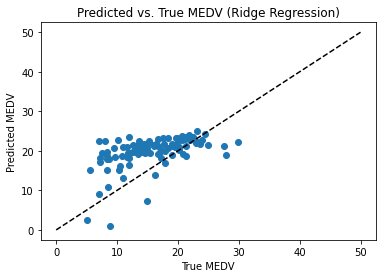

In [18]:
import matplotlib.pyplot as plt

# 绘制预测结果和真实结果的对比图
y_pred = linear_reg.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], "--k")
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs. True MEDV (Ridge Regression)")
plt.show()

## 寻找最好的三个特征

**相关性分析:** 计算每个特征与目标变量之间的相关系数，并选择相关系数较高的特征。可以使用pandas 库中的corr()函数来计算相关系数矩阵，然后选择相关系数较高的特征。例如，可以选择与目标变量的相关系数绝对值大于某个阈值（比如0.5)）的特征。


In [20]:
## 相关性分析寻找
corr_matrix = housing_data.corr()
print(corr_matrix["MEDV"].abs().sort_values(ascending=False))

MEDV       1.000000
LSTAT      0.723619
RM         0.710824
PTRATIO    0.508617
INDUS      0.478657
TAX        0.468536
NOX        0.427321
RAD        0.381626
AGE        0.380223
CRIM       0.379695
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
Name: MEDV, dtype: float64


**随机森林:** 使用随机森林模型可以计算每个特征的重要性分数，并选择重要性分数较高的特征。可以使用scikit-learn库中的RandomForestRegressor()函数来训练随机森林模型，并选择重要性分数较高的特征。


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 将特征和标签分开
X = housing_data.drop("MEDV", axis=1)
y = housing_data["MEDV"]

# 训练随机森林模型并计算特征重要性参数
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)
feature_importances = rf_reg.feature_importances_

# 将特征重要性参数和特征名称联系起来
feature_importances_df = pd.DataFrame({"feature": X.columns, "importance": feature_importances})

# 按照重要性参数的大小进行排序
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

# 打印特征重要性参数和特征名称
print(feature_importances_df)

    feature  importance
5        RM    0.492962
12    LSTAT    0.302115
7       DIS    0.067240
0      CRIM    0.042561
4       NOX    0.024524
10  PTRATIO    0.018544
9       TAX    0.014914
6       AGE    0.012387
11        B    0.011306
2     INDUS    0.006511
8       RAD    0.004402
1        ZN    0.001307
3      CHAS    0.001224


于是我们选择RM LSTAT PTRATIO 进行训练

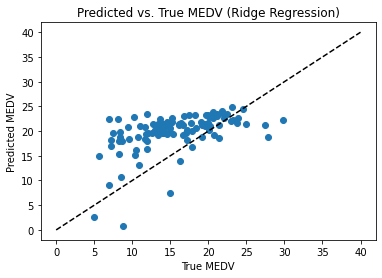

In [27]:
# 随机选取特征和标签
feature_cols = ['CRIM', 'ZN', 'AGE']
target_col = 'MEDV'

X = housing_data[feature_cols]
y = housing_data[target_col]

# 划分训练集和测试集
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

# 对数据进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# 绘制预测结果和真实结果的对比图
y_pred = linear_reg.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot([0, 40], [0, 40], "--k")
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs. True MEDV (Ridge Regression)")
plt.show()

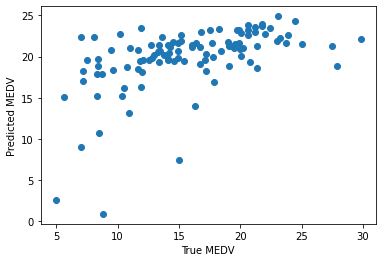

In [26]:
import matplotlib.pyplot as plt

# 在测试集上进行预测
y_pred = linear_reg.predict(X_test_scaled)

# 绘制散点图
plt.scatter(y_test, y_pred)
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.show()

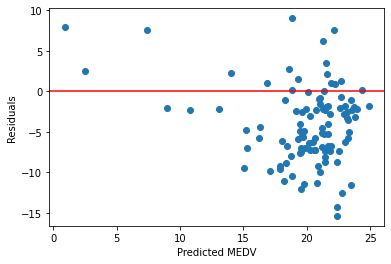

In [28]:
# 计算预测误差
residuals = y_test - y_pred

# 绘制残差图
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

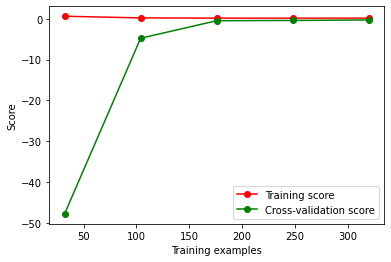

In [29]:
from sklearn.model_selection import learning_curve

# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X_train_scaled, y_train, cv=5)

# 绘制学习曲线
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()